In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Tetiana\Documents\ironhack\lab\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.shape

(9134, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace("employmentstatus", "employment_status")
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [8]:
df['effective_to_date']

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective_to_date, Length: 9134, dtype: object

In [9]:
df['effective_to_date']=pd.to_datetime(df['effective_to_date'])

In [10]:
df.dtypes


customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [11]:
df.describe()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,2011-01-29 20:06:21.519597056,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
min,1898.007675,2011-01-01 00:00:00,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,2011-01-15 00:00:00,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,2011-01-29 00:00:00,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,2011-02-13 00:00:00,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,2011-02-28 00:00:00,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678
std,6870.967608,NaN,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092


In [12]:
nulls = pd.DataFrame(df.isna().sum()*100/len(df), columns=['percentage'])
nulls[nulls['percentage'] > 0].sort_values('percentage', ascending = False)

,percentage


In [13]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [14]:
numerical = df.select_dtypes("number")
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [15]:
correlations_matrix = numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [16]:
correlations_matrix["total_claim_amount"].sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.632017
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
months_since_policy_inception    0.003335
number_of_policies              -0.002354
number_of_open_complaints       -0.014241
income                          -0.355254
Name: total_claim_amount, dtype: float64

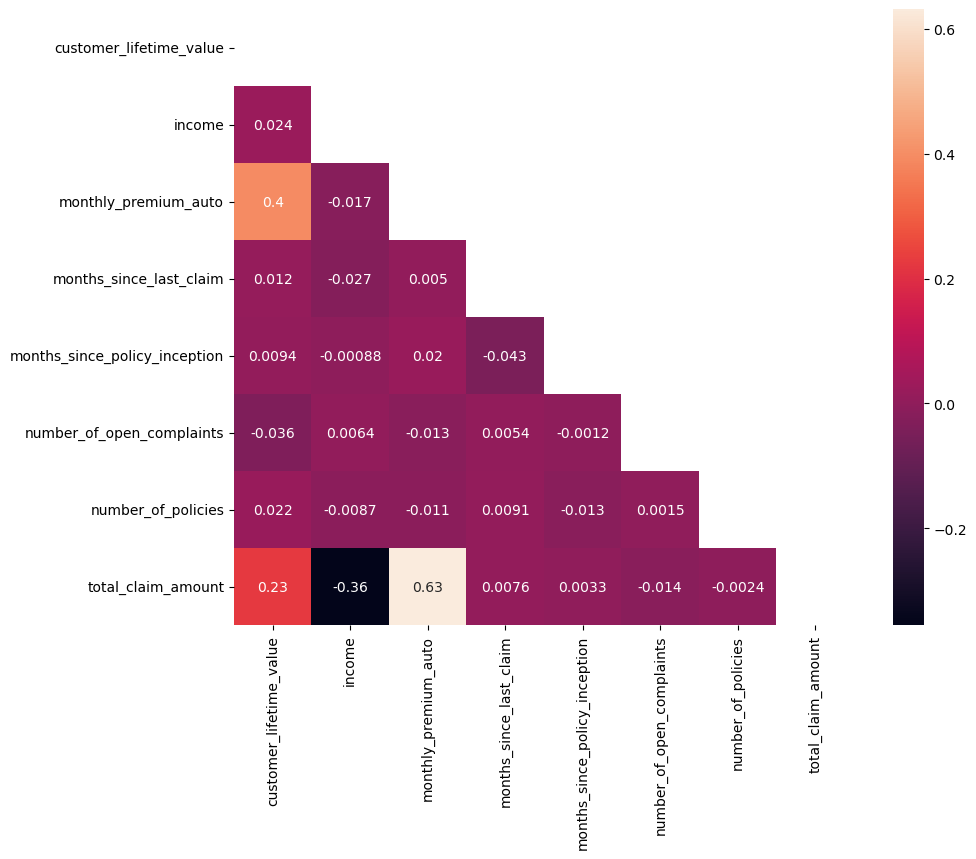

In [17]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

We can't see multicollinearity between columns 

customer_lifetime_value


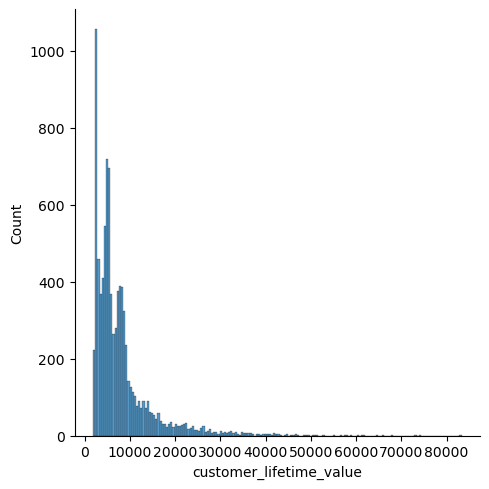

income


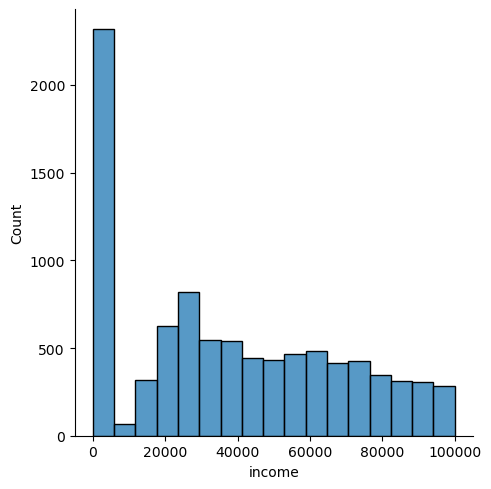

monthly_premium_auto


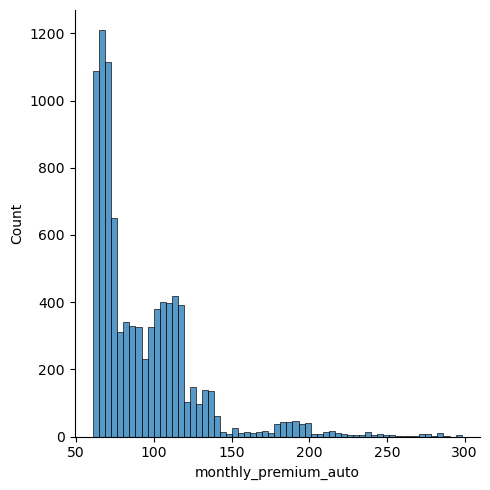

months_since_last_claim


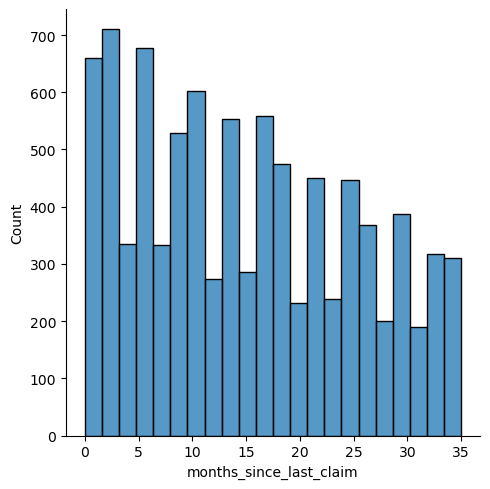

months_since_policy_inception


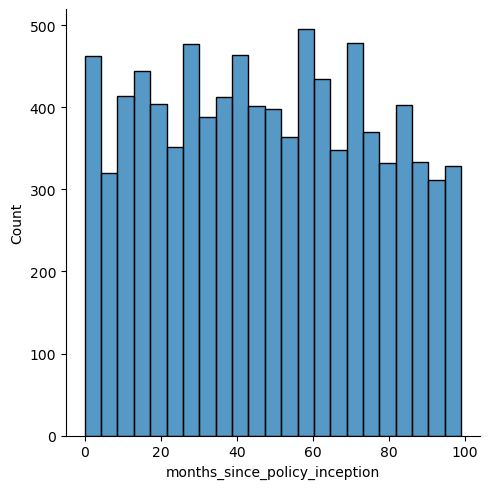

number_of_open_complaints


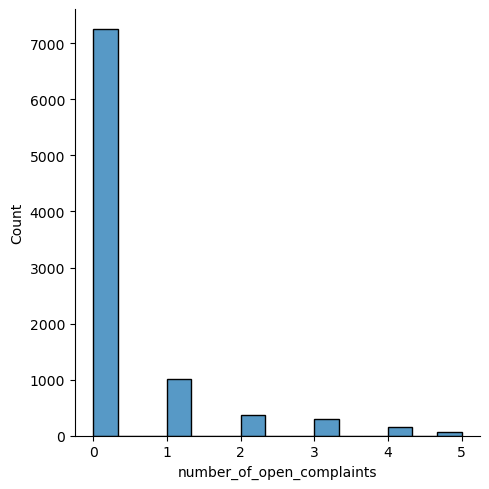

number_of_policies


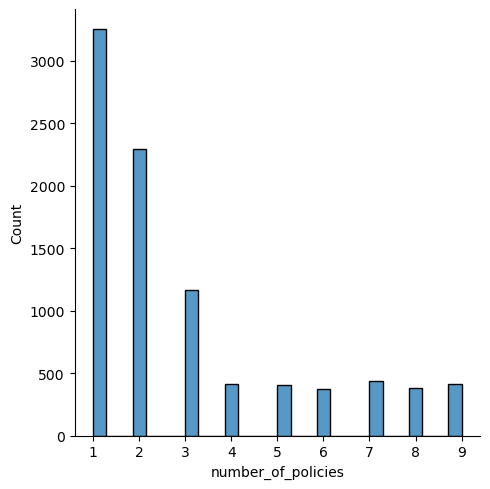

total_claim_amount


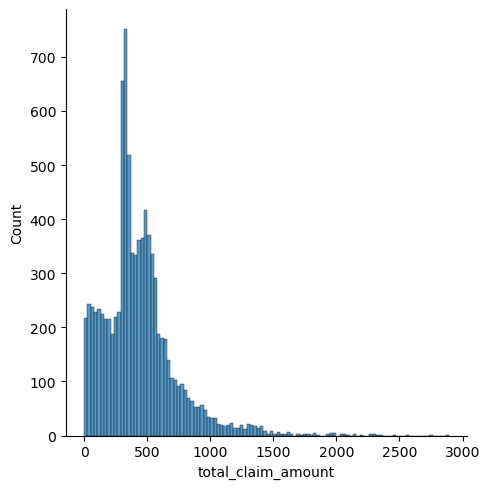

In [18]:
for col in numerical.columns:
    print(col)
    sns.displot(numerical[col])
    plt.show()


We can see that columns with continuous variables(total_claim_amount, monthly_premium_auto, income, customer_lifetiem_value) have mostly normal destribution with scew on the right(because all of this columns represent money). Income have a lot of '0' variables; we can try to get rid of them. Another columns distinct.

<function matplotlib.pyplot.show(close=None, block=None)>

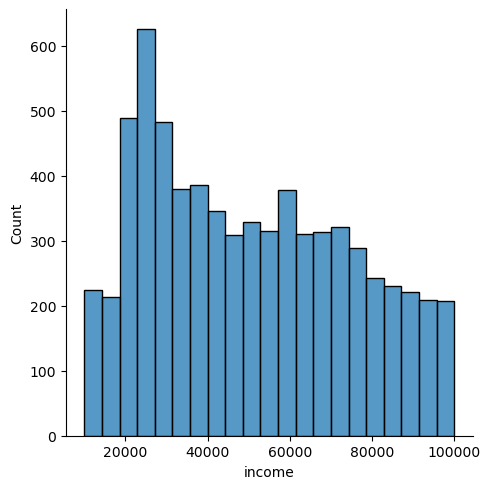

In [19]:
income = numerical[(numerical['income']>0)]
sns.displot(income['income'])
plt.show

**Outliers**


customer_lifetime_value


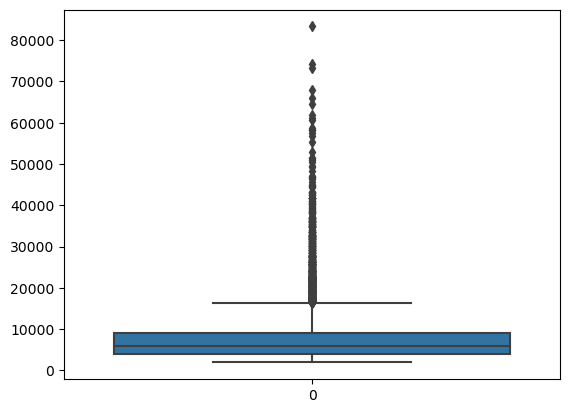

income


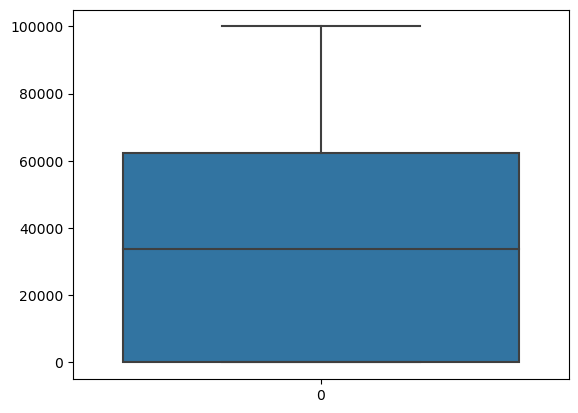

monthly_premium_auto


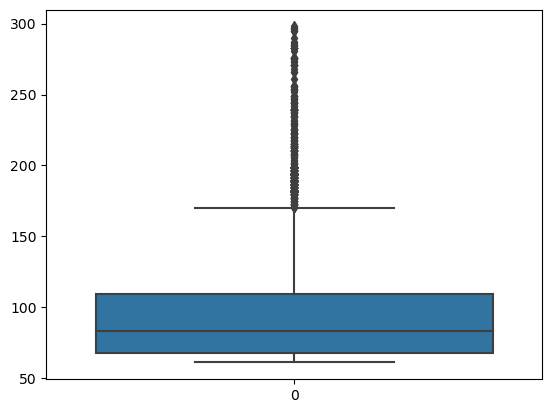

months_since_last_claim


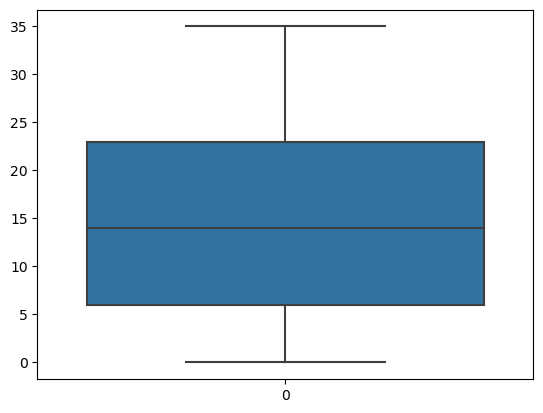

months_since_policy_inception


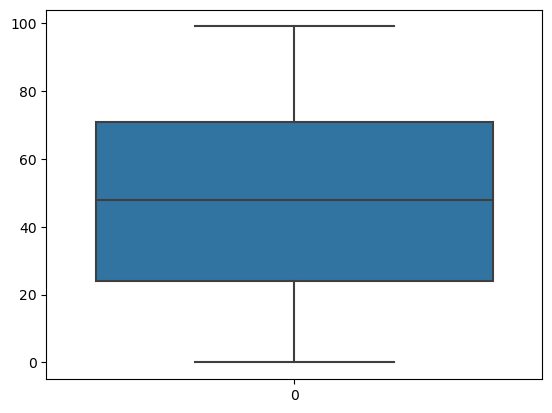

number_of_open_complaints


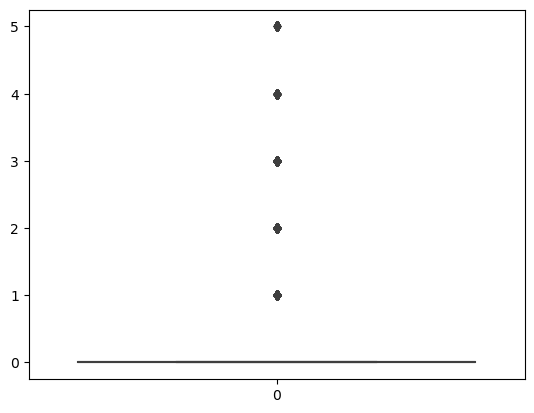

number_of_policies


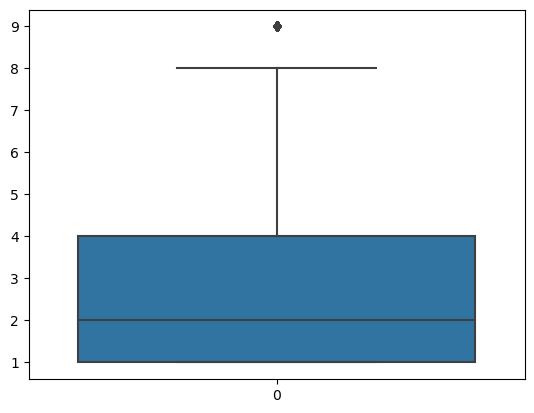

total_claim_amount


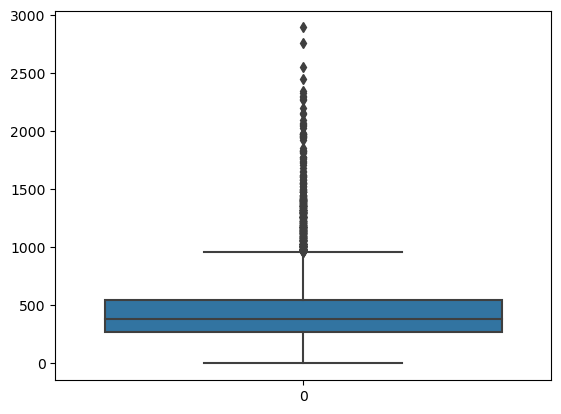

In [20]:
for col in numerical.columns:
    print(col)
    sns.boxplot(numerical[col])
    plt.show()

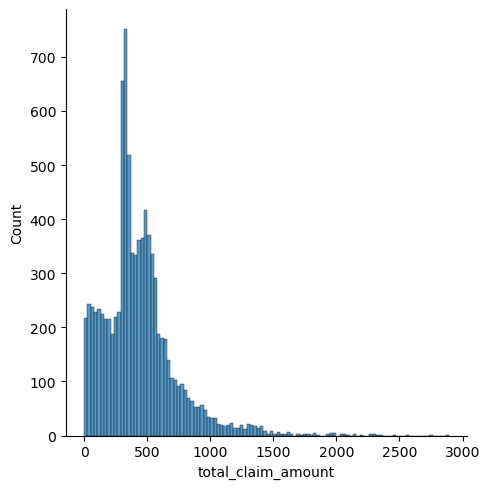

In [21]:
sns.displot(df['total_claim_amount'])

In [22]:

numerical_columns = df.select_dtypes('number').columns
for column in numerical_columns:
    IQR = abs(np.quantile(df[column], 0.75) - np.quantile(df[column], 0.25)) * 1.5
    lower_boundary = np.quantile(df[column], 0.25) - IQR
    upper_boundary = np.quantile(df[column], 0.75) + IQR
    df = df[(df[column] >= lower_boundary) & (df[column] <= upper_boundary)]
df


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,TF56202,California,5032.165498,No,Basic,College,2011-02-12,Employed,M,66367,Suburban,Divorced,64,6,48,0,3,Personal Auto,Personal L3,Offer2,Call Center,307.200000,Two-Door Car,Small
9128,YM19146,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


I will filter the data in important for analysis columns after finding Interquartile Range.

customer_lifetime_value


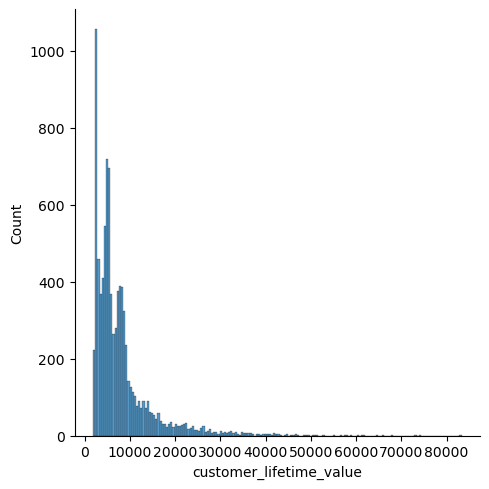

income


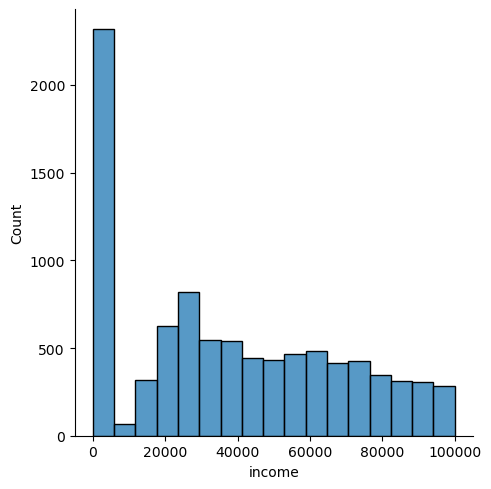

monthly_premium_auto


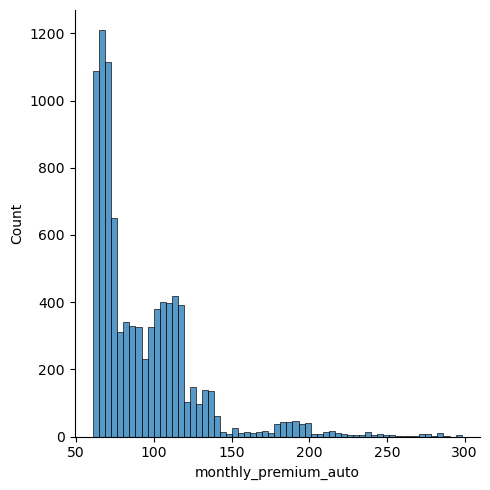

months_since_last_claim


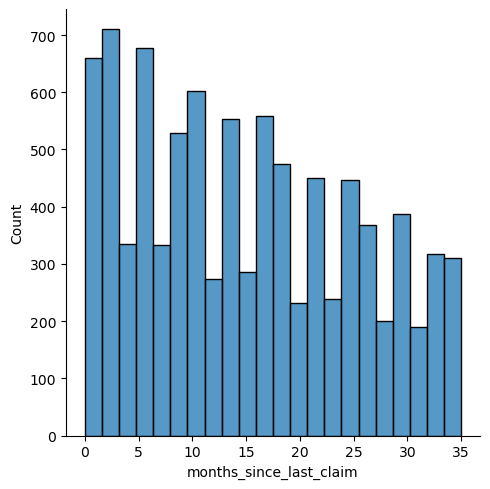

months_since_policy_inception


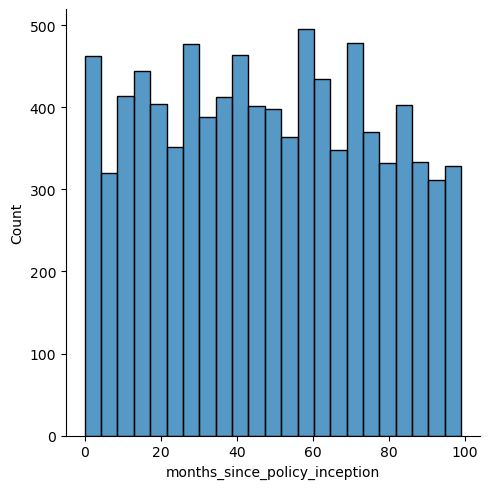

number_of_open_complaints


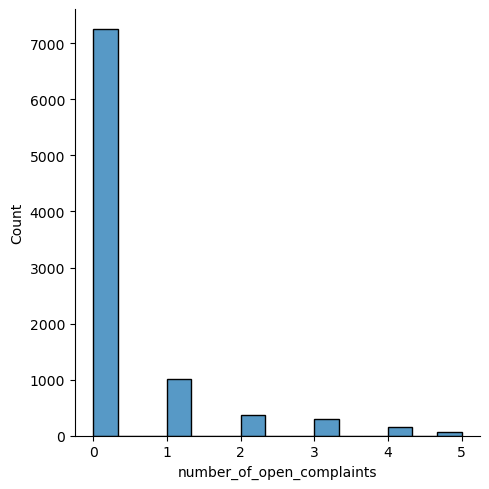

number_of_policies


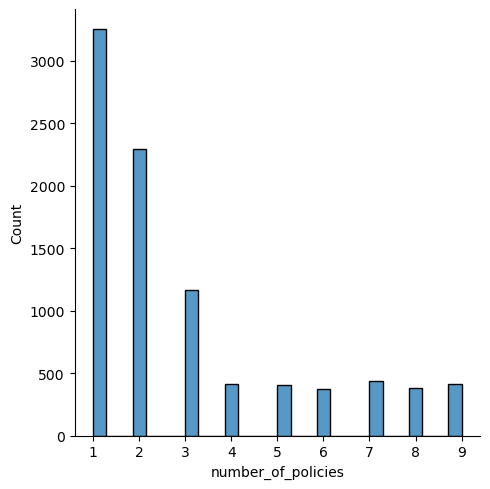

total_claim_amount


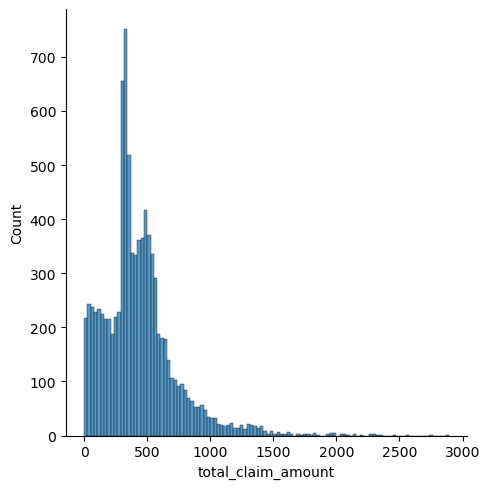

In [23]:
for col in numerical.columns:
    print(col)
    sns.displot(numerical[col])
    plt.show()

In [24]:
categorical = df.select_dtypes('object')
categorical.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [25]:
categorical.drop(columns=['customer'], inplace=True)
categorical

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,California,No,Basic,College,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer2,Call Center,Two-Door Car,Small
9128,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


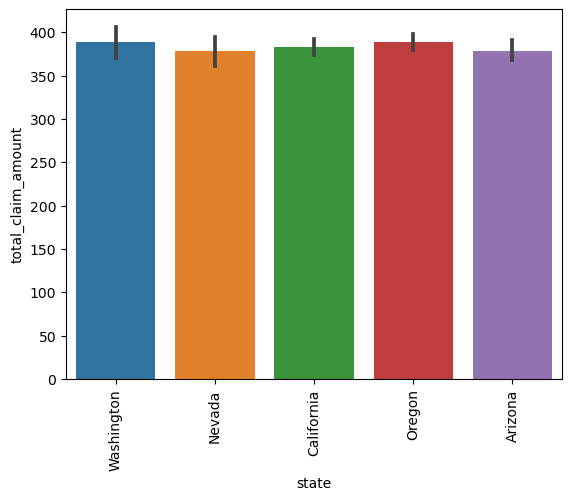

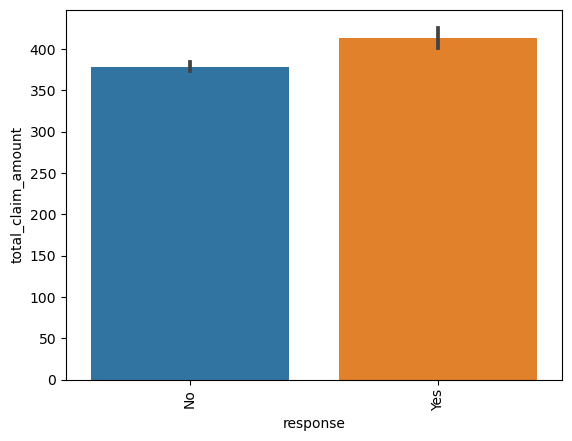

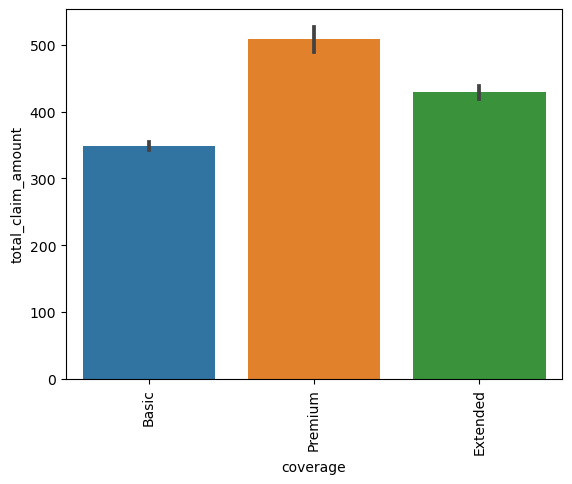

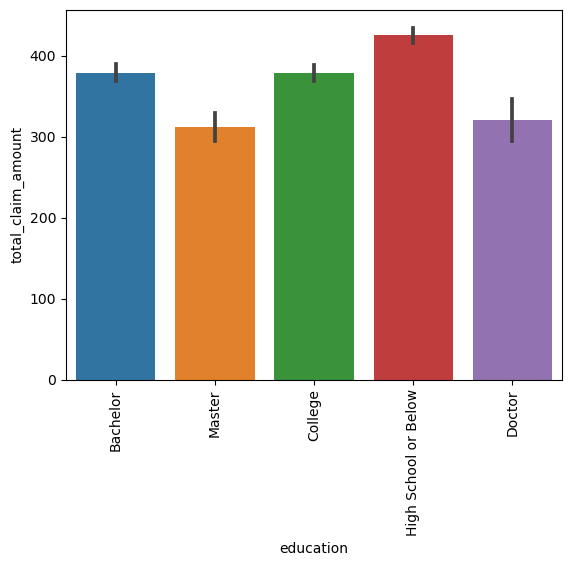

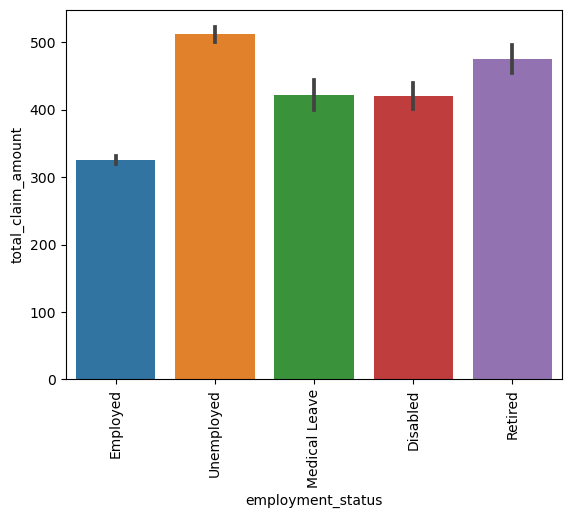

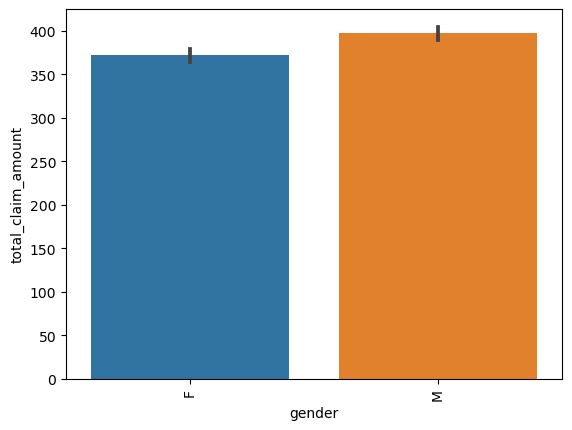

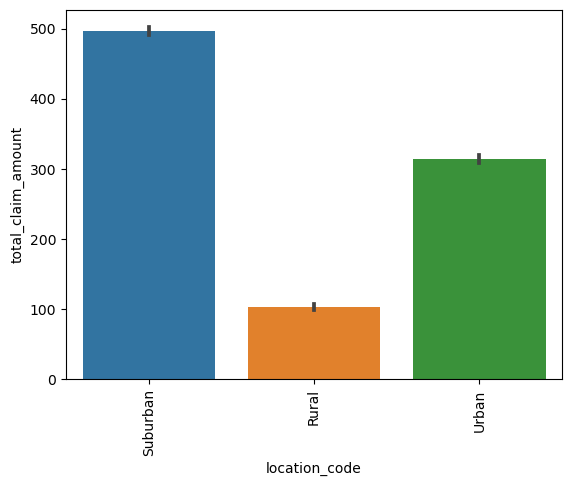

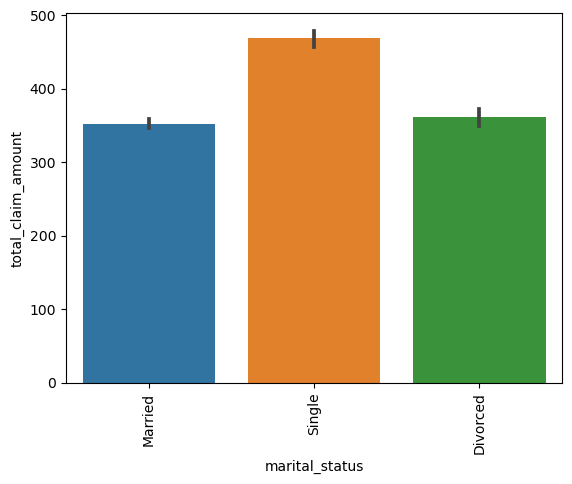

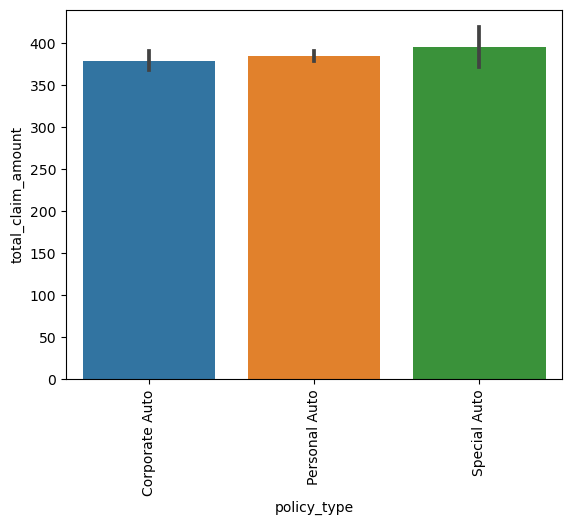

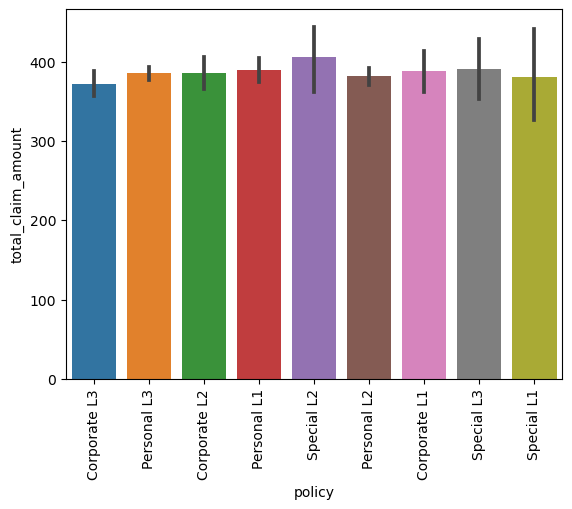

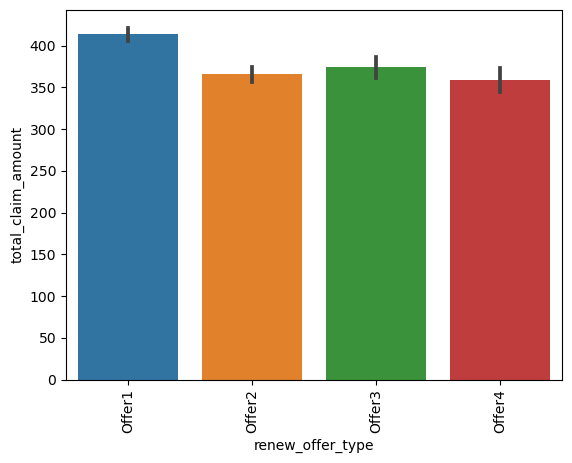

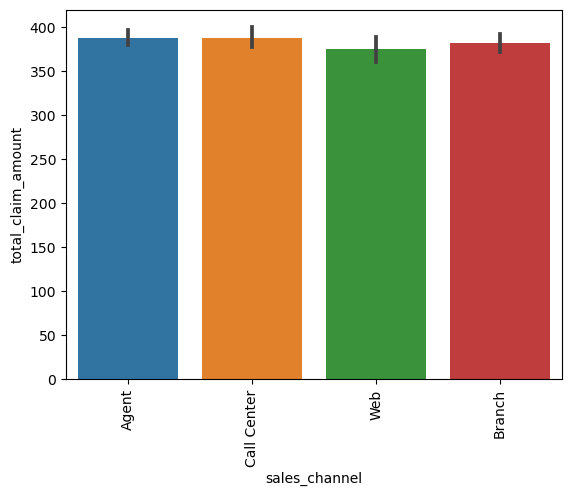

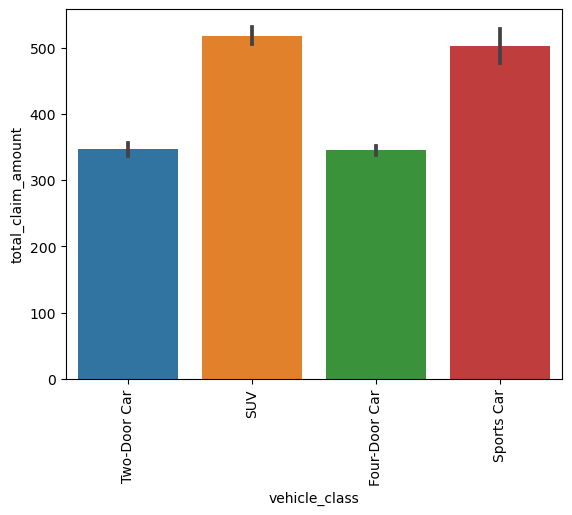

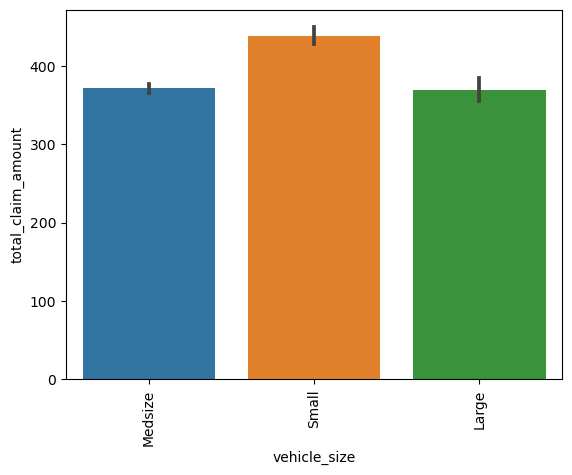

In [26]:
for col in categorical.columns:
    sns.barplot(x=categorical[col], y=df['total_claim_amount'])
    plt.xticks(rotation=90)
    plt.show()

Before plotting the data we deleted customer column because there were unique id values which didn't contain any relevant info for analysis.We can see that total_claim_amount almost the same for all states, so doesn't depend on state, as well doesn't depend on response, gender, policy_type(categories has almost the same claim, but special_auto has bigger variabilities), polica(special L1 has big variability, as well as l2, l3), sales channel. We can see that claim-amount bigger for premium coverage,suburban in location code, for single in marital-status, luxury_car in vehicle_class and small_size. 

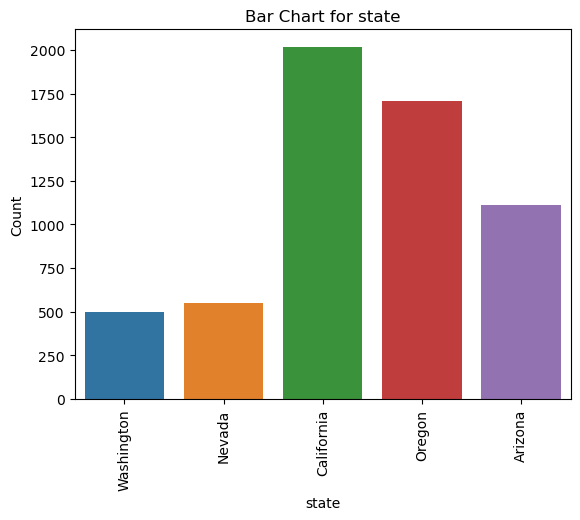

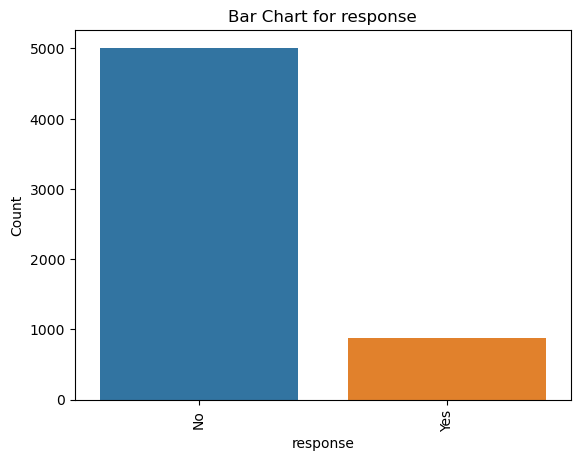

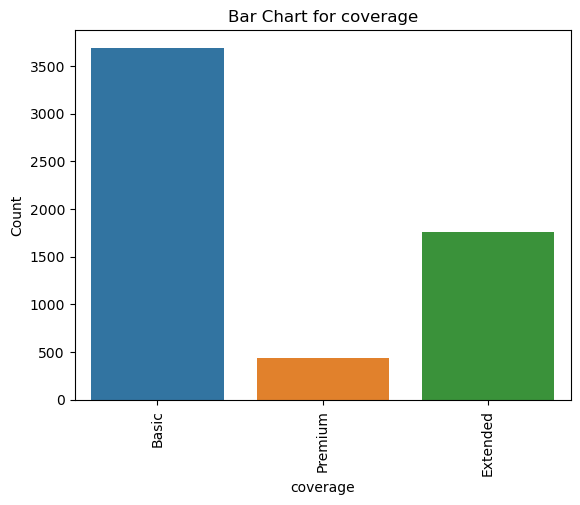

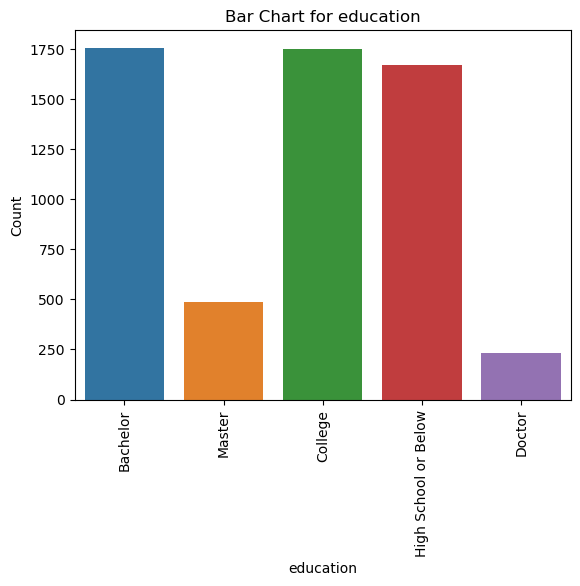

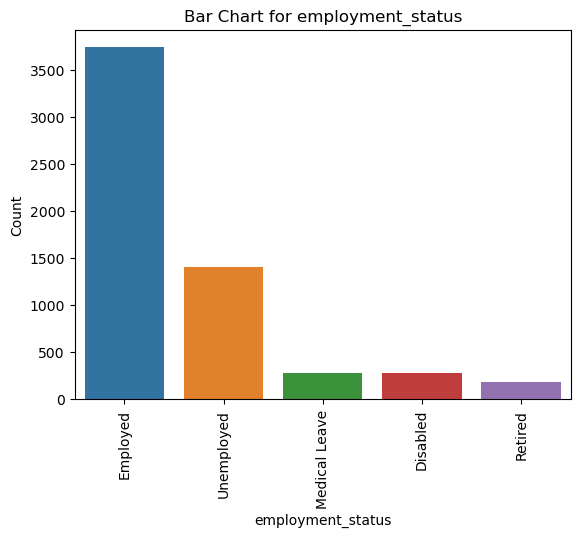

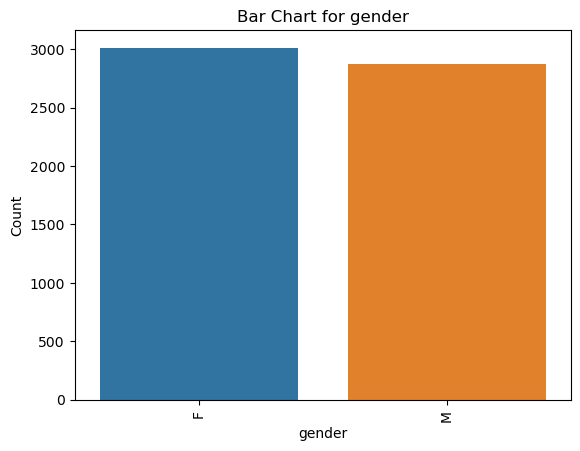

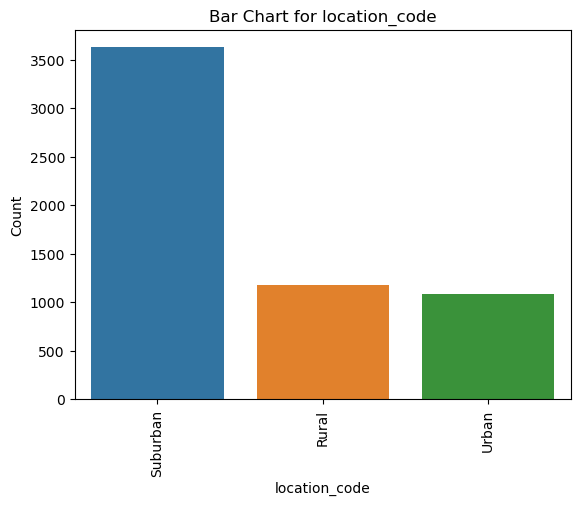

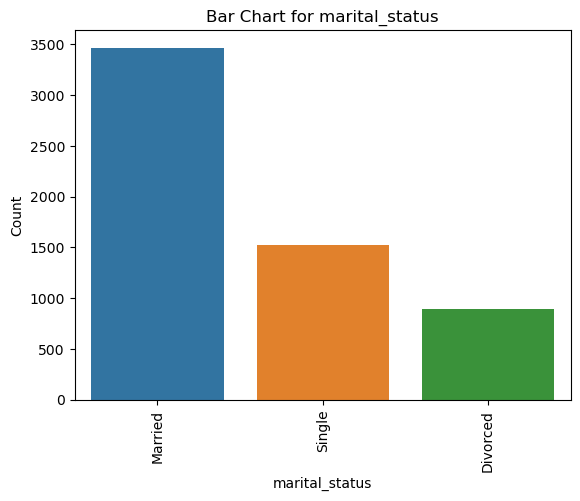

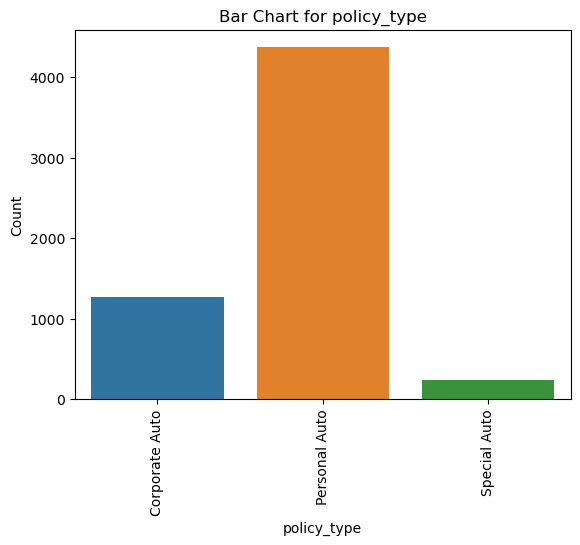

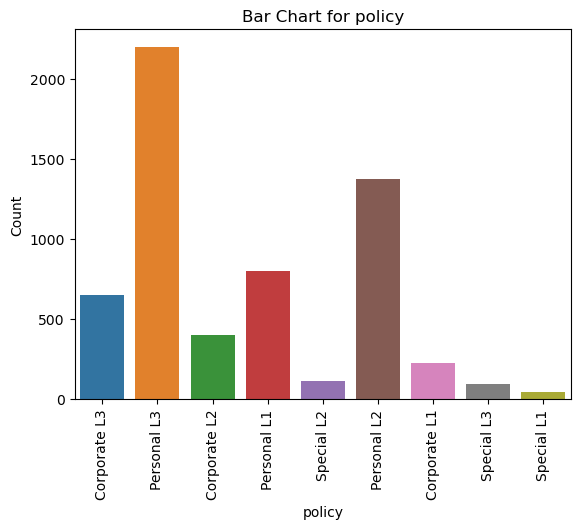

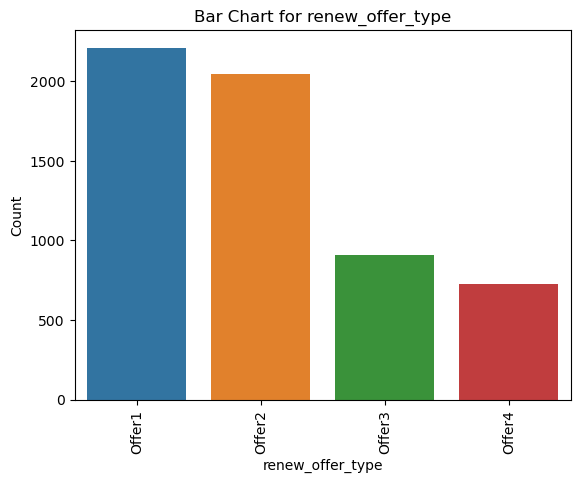

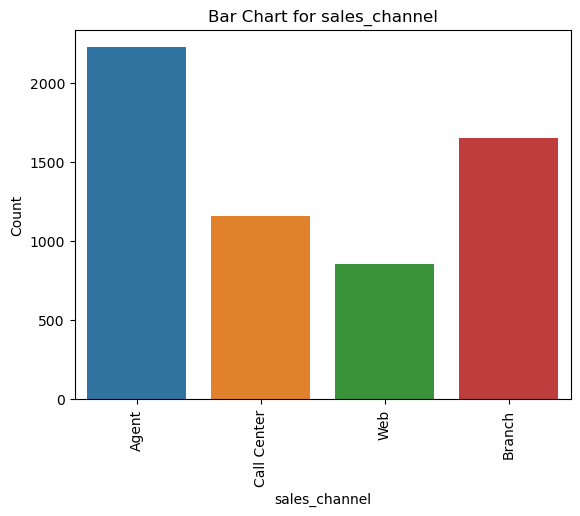

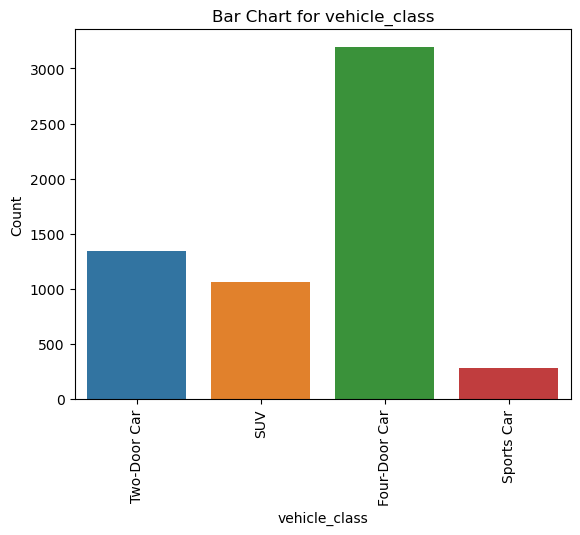

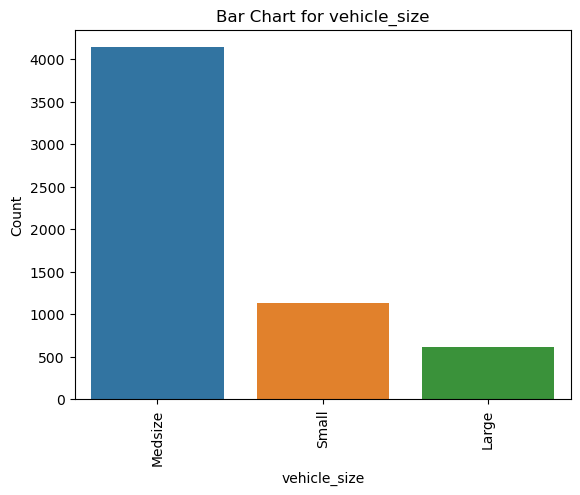

In [27]:
for col in categorical.columns:
    sns.countplot(x=col, data=categorical)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Bar Chart for {col}')
    plt.xticks(rotation=90)
    plt.show()

Countplot can help us to see actual count of all features from different categories and compare them. It helps us to understand how common each category is within that variable. We can use countplot and barplot together for better understanding relationships between variables and target.

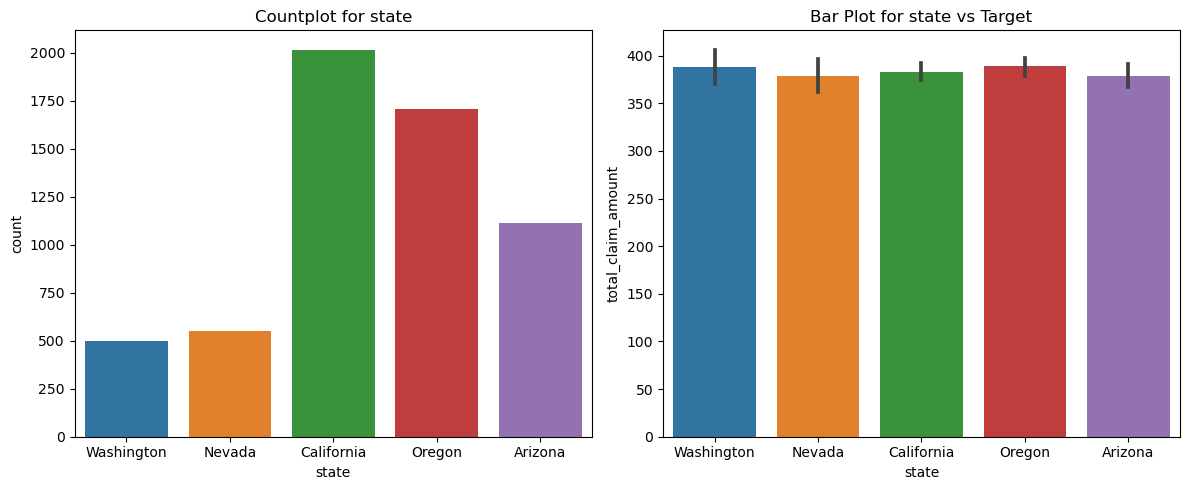

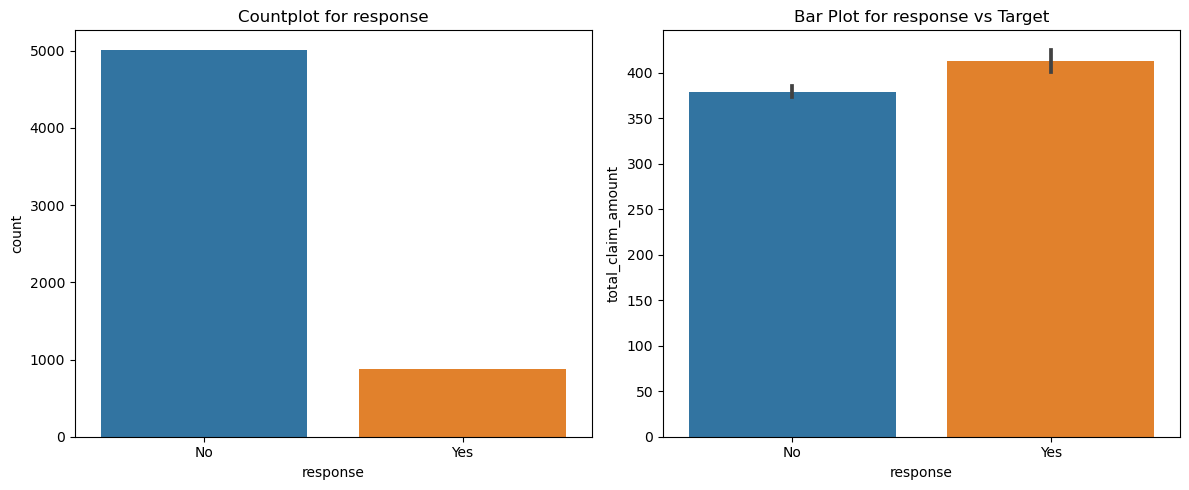

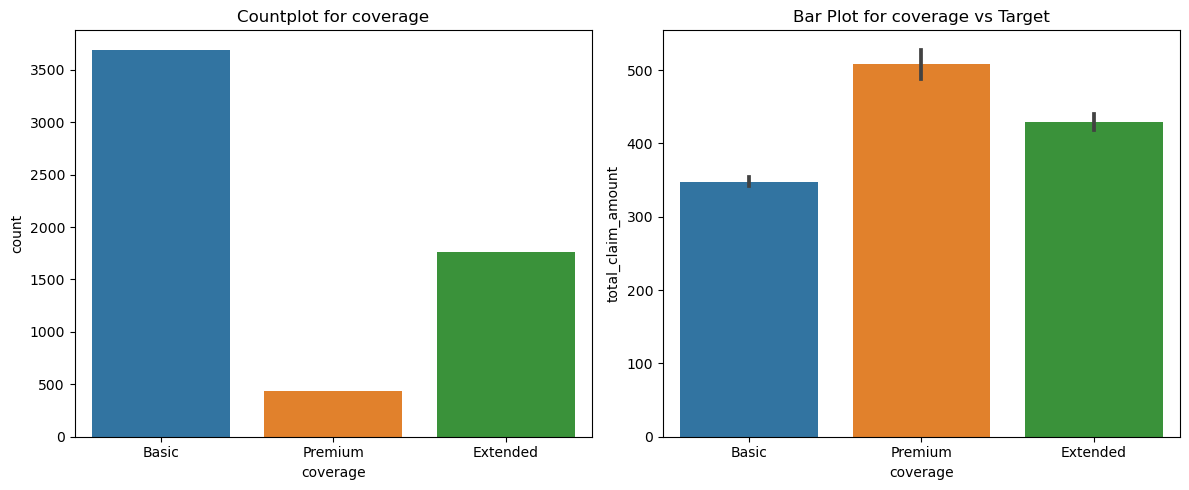

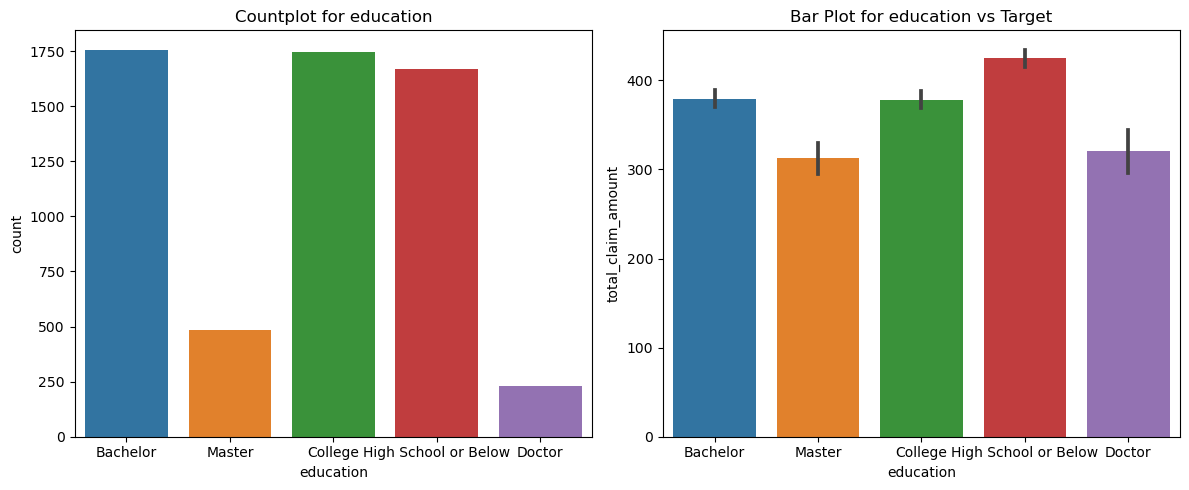

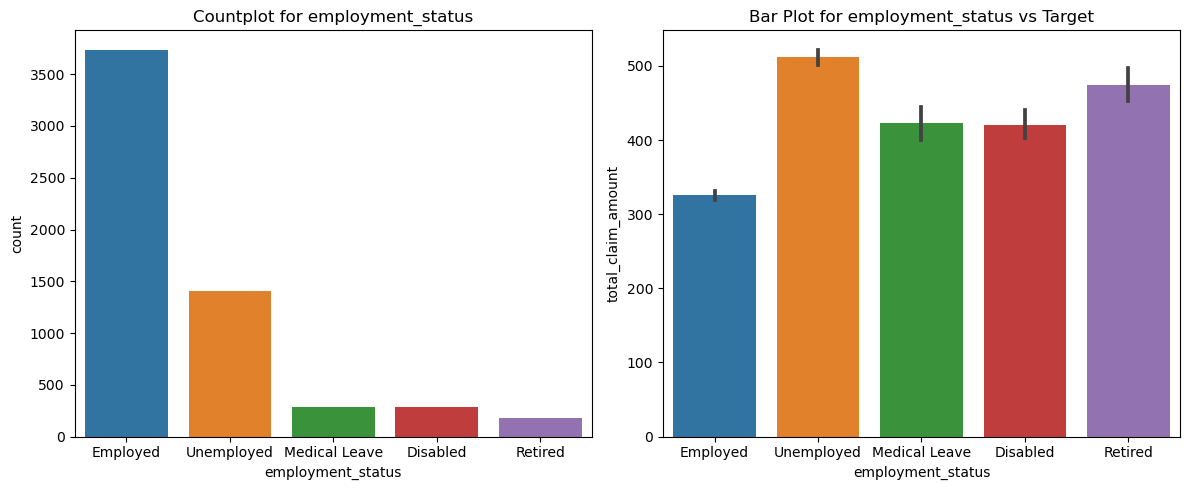

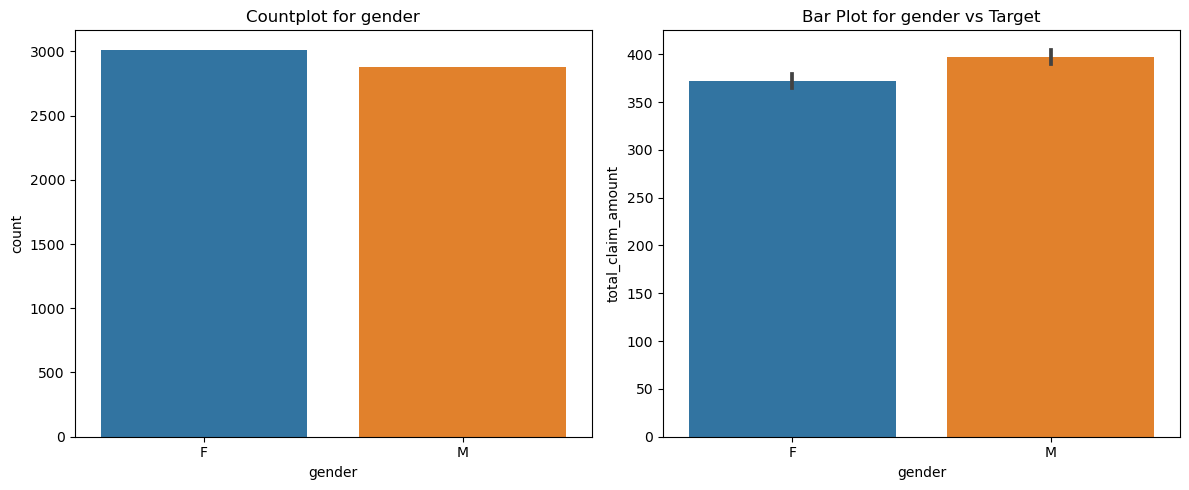

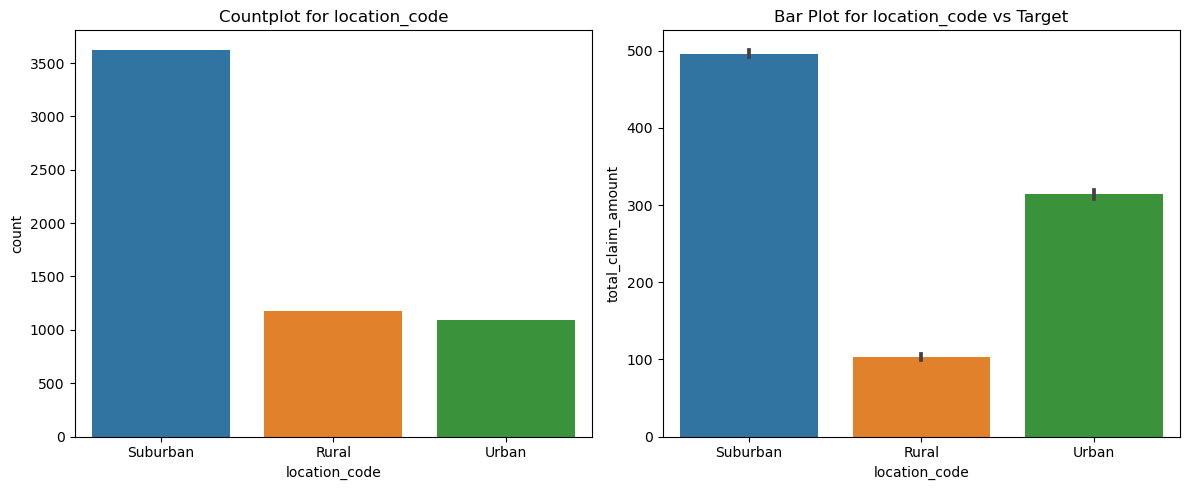

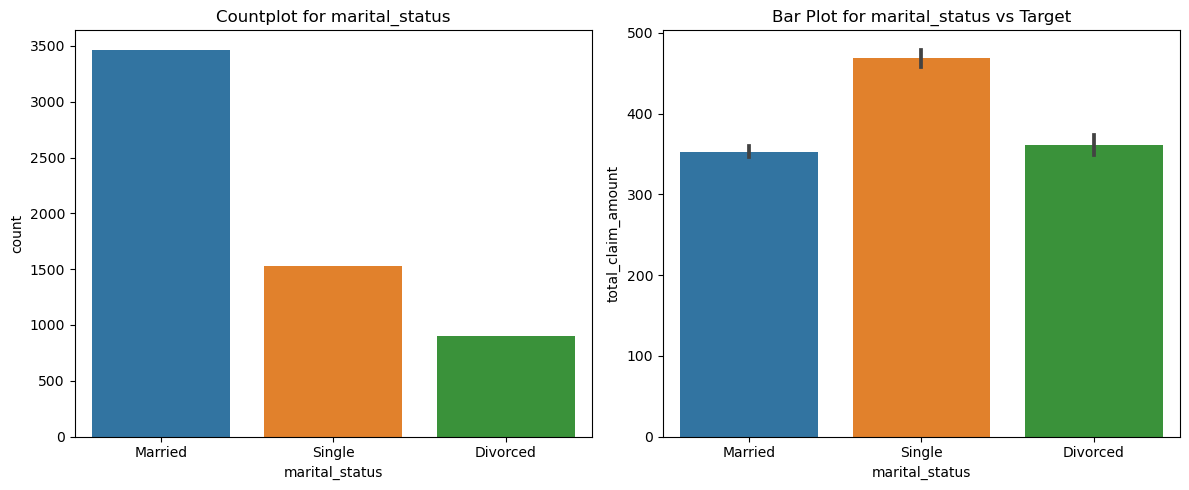

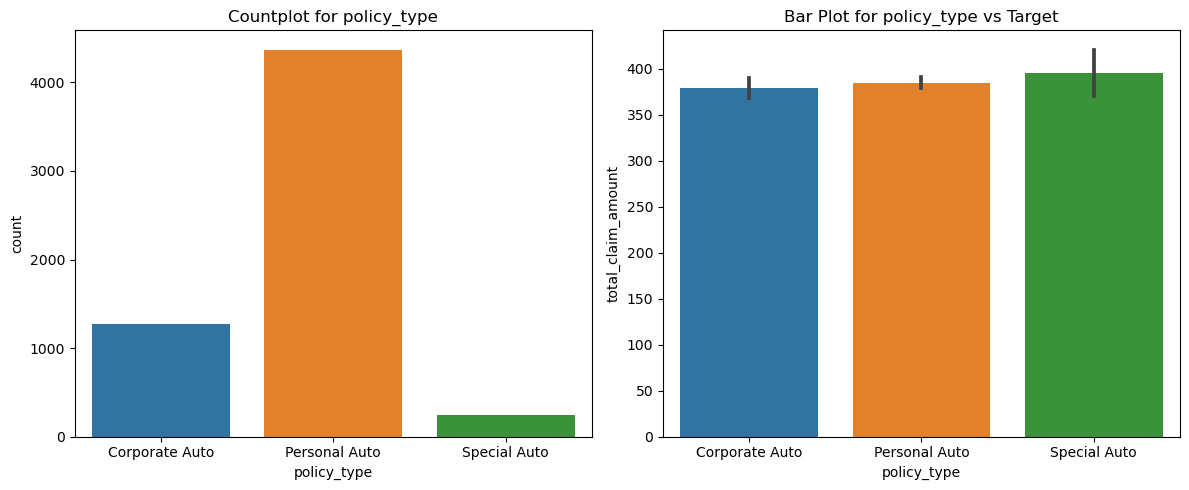

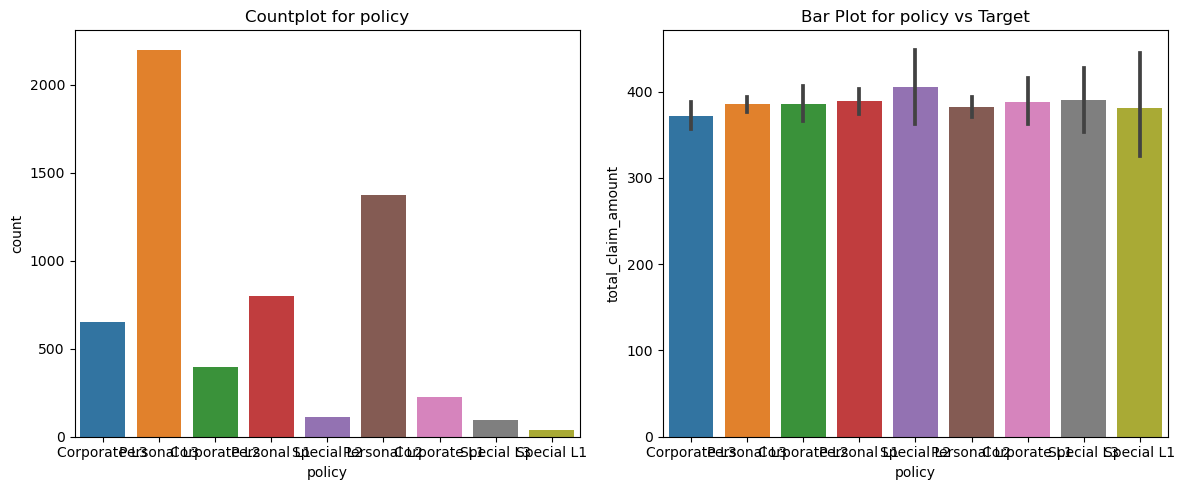

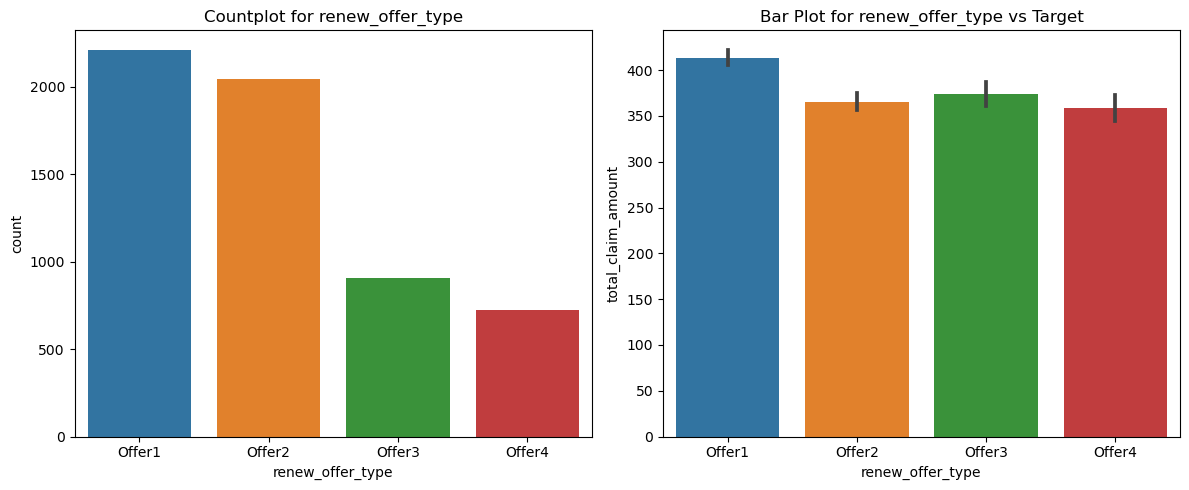

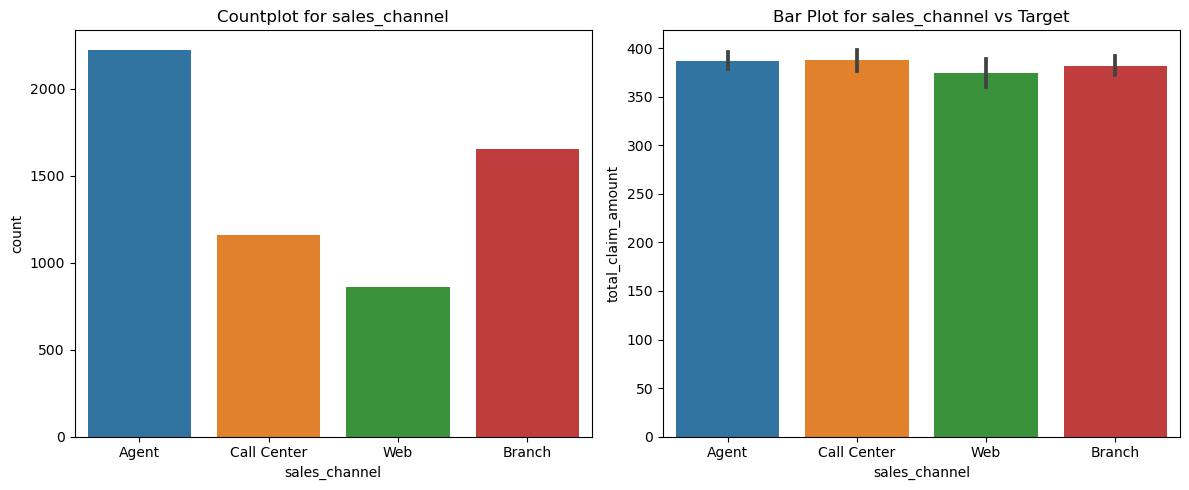

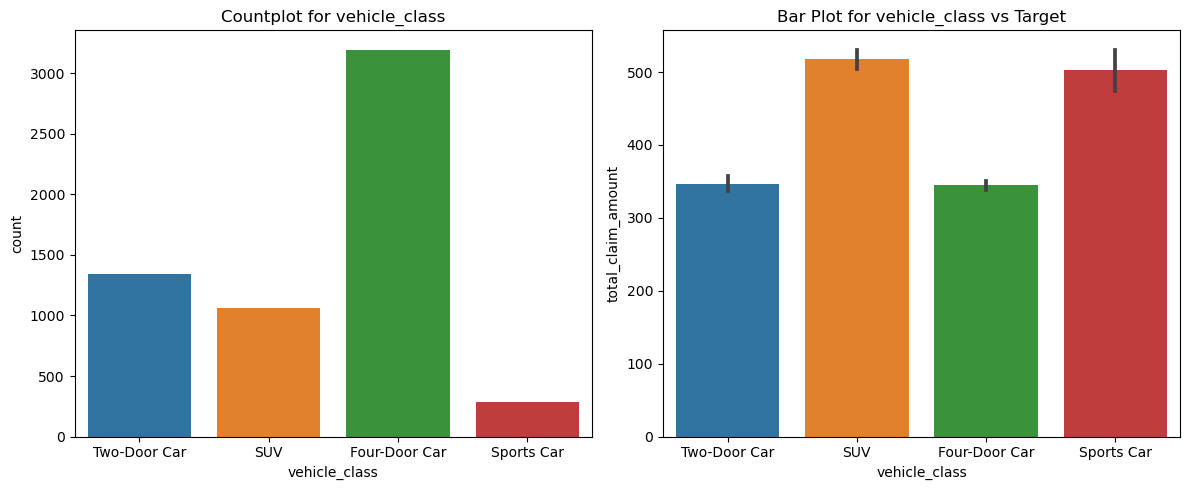

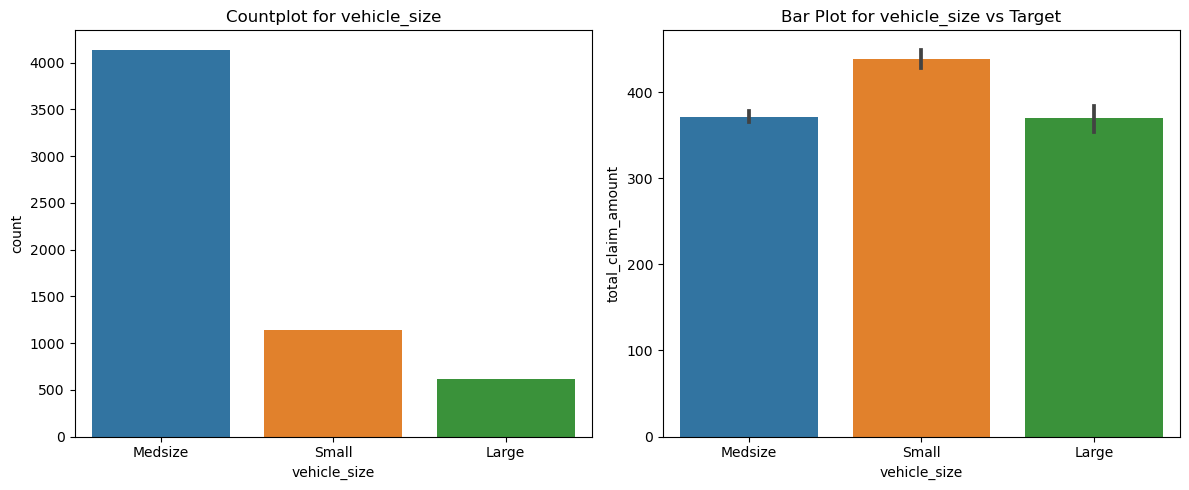

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical.columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=categorical)
    plt.title(f'Countplot for {col}')
    plt.subplot(1, 2, 2)
    sns.barplot(x=col, y='total_claim_amount', data=df)
    plt.title(f'Bar Plot for {col} vs Target')
    plt.tight_layout()
    plt.show()


In [29]:
for col in categorical.columns:
    print(categorical[col].value_counts())

state
California    2016
Oregon        1709
Arizona       1114
Nevada         553
Washington     496
Name: count, dtype: int64
response
No     5012
Yes     876
Name: count, dtype: int64
coverage
Basic       3691
Extended    1762
Premium      435
Name: count, dtype: int64
education
Bachelor                1756
College                 1747
High School or Below    1669
Master                   485
Doctor                   231
Name: count, dtype: int64
employment_status
Employed         3737
Unemployed       1406
Medical Leave     282
Disabled          282
Retired           181
Name: count, dtype: int64
gender
F    3013
M    2875
Name: count, dtype: int64
location_code
Suburban    3625
Rural       1175
Urban       1088
Name: count, dtype: int64
marital_status
Married     3466
Single      1524
Divorced     898
Name: count, dtype: int64
policy_type
Personal Auto     4370
Corporate Auto    1274
Special Auto       244
Name: count, dtype: int64
policy
Personal L3     2198
Personal L2     1371
P

We don't need to clean our categorical data here, because for every column we have small amount of features and they all standerdized.

In [30]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [31]:
drop_col = ['total_claim_amount','customer','effective_to_date' ]
X=df.drop(drop_col, axis=1)
X.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [32]:
X.select_dtypes('object')

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,California,No,Basic,College,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer2,Call Center,Two-Door Car,Small
9128,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [33]:
y = df['total_claim_amount']
X = pd.get_dummies(X, columns=X.select_dtypes('object').columns, drop_first=True)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.7855081174983899
MAE: 72.83389534091023
RMSE: 93.02594892149718


**Result before removing outliers:**
R2: 0.7626526452366112
MAE: 94.53603676984038
RMSE: 137.3744343060165

In [35]:
data_importance = pd.Series([abs(i) for i in lr.coef_], index=X_train.columns).sort_values(ascending=False)
data_importance

policy_type_Special Auto           2.580395e+14
policy_Special L2                  1.763587e+14
policy_Personal L3                 1.662912e+14
policy_Special L3                  1.586832e+14
policy_type_Personal Auto          1.507863e+14
policy_Personal L2                 1.459926e+14
policy_Personal L1                 1.170475e+14
policy_Special L1                  1.104005e+14
number_of_open_complaints          9.260050e+13
location_code_Suburban             1.732099e+02
monthly_premium_auto               8.734935e+01
location_code_Urban                8.164791e+01
marital_status_Single              2.041454e+01
employment_status_Unemployed       1.940395e+01
income                             8.313653e+00
renew_offer_type_Offer2            6.056012e+00
vehicle_size_Small                 5.819301e+00
vehicle_class_SUV                  4.537115e+00
renew_offer_type_Offer4            3.854823e+00
education_High School or Below     3.584891e+00
number_of_policies                 2.985

In [36]:
data_importance.index[:20]

Index(['policy_type_Special Auto', 'policy_Special L2', 'policy_Personal L3',
       'policy_Special L3', 'policy_type_Personal Auto', 'policy_Personal L2',
       'policy_Personal L1', 'policy_Special L1', 'number_of_open_complaints',
       'location_code_Suburban', 'monthly_premium_auto', 'location_code_Urban',
       'marital_status_Single', 'employment_status_Unemployed', 'income',
       'renew_offer_type_Offer2', 'vehicle_size_Small', 'vehicle_class_SUV',
       'renew_offer_type_Offer4', 'education_High School or Below'],
      dtype='object')

In [37]:

X = X[data_importance.index[:25]]
y = df["total_claim_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.7846998457381573
MAE: 73.11316296903142
RMSE: 93.20105938425452


**Before outliers remove:** 
R2: 0.7626105853062113
MAE: 94.41346982330717
RMSE: 137.38660571445382

<Axes: >

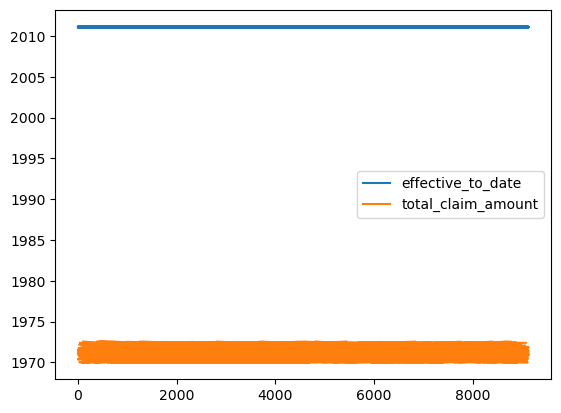

In [38]:
df[['effective_to_date','total_claim_amount']].sort_values('effective_to_date').plot()

In [39]:
df['effective_to_date'].value_counts()

effective_to_date
2011-01-27    128
2011-01-11    122
2011-02-14    122
2011-01-20    118
2011-02-03    117
2011-01-03    115
2011-01-10    114
2011-01-28    114
2011-01-19    113
2011-02-27    111
2011-01-21    111
2011-02-05    111
2011-01-26    110
2011-01-05    109
2011-01-17    109
2011-01-31    107
2011-01-23    107
2011-01-08    106
2011-02-25    106
2011-02-28    106
2011-02-12    106
2011-01-02    105
2011-02-10    104
2011-01-29    104
2011-02-07    104
2011-02-19    102
2011-01-07    101
2011-02-06    101
2011-01-25    100
2011-02-11    100
2011-02-02    100
2011-01-06     99
2011-02-21     99
2011-01-15     97
2011-01-18     97
2011-02-26     97
2011-01-14     95
2011-02-16     94
2011-02-18     93
2011-02-01     93
2011-02-22     92
2011-02-23     92
2011-02-04     92
2011-02-17     90
2011-01-30     90
2011-01-22     90
2011-01-09     88
2011-01-01     88
2011-02-24     87
2011-02-08     87
2011-02-09     86
2011-02-13     85
2011-01-12     85
2011-02-20     85
2011-01-24

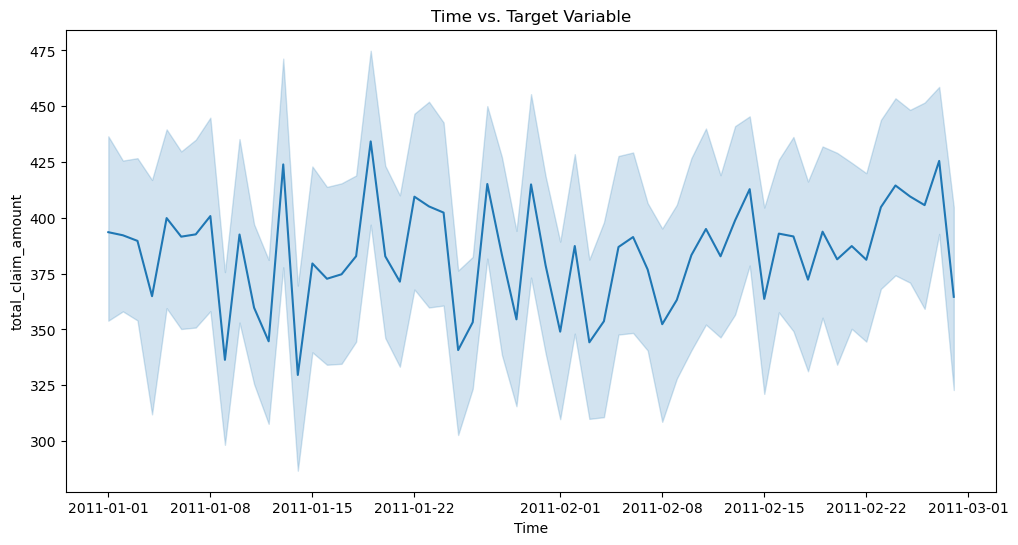

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=df)
plt.title('Time vs. Target Variable')
plt.xlabel('Time')
plt.ylabel('total_claim_amount')
plt.show()

In [41]:
df1=df.copy()
df1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,TF56202,California,5032.165498,No,Basic,College,2011-02-12,Employed,M,66367,Suburban,Divorced,64,6,48,0,3,Personal Auto,Personal L3,Offer2,Call Center,307.200000,Two-Door Car,Small
9128,YM19146,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [42]:
df1.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [43]:
y1 = df1['total_claim_amount']
X1 = df1.drop(['customer', 'total_claim_amount'], axis=1)
X1.head()


,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [44]:
X1.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

In [45]:
X1 = pd.get_dummies(X1, columns=['state','marital_status', 'policy_type','policy','renew_offer_type','sales_channel','vehicle_class'], drop_first=True)
X1

,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,69,32,5,0,1,Medsize,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,108,18,38,0,2,Medsize,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
3,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,106,18,65,0,7,Medsize,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
4,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,73,12,44,0,1,Medsize,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,69,14,94,0,2,Medsize,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,5032.165498,No,Basic,College,2011-02-12,Employed,M,66367,Suburban,64,6,48,0,3,Small,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True
9128,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,Suburban,104,16,58,0,1,Large,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
9130,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,79,14,28,0,1,Medsize,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9132,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,96,34,3,0,3,Large,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False


In [46]:
X1["coverage"] = X1["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X1["coverage"]

0       0
2       2
3       0
4       0
5       0
       ..
9127    0
9128    2
9130    1
9132    1
9133    1
Name: coverage, Length: 5888, dtype: int64

In [47]:
X1["employment_status"].value_counts()


employment_status
Employed         3737
Unemployed       1406
Medical Leave     282
Disabled          282
Retired           181
Name: count, dtype: int64

In [48]:
X1["employment_status"] = X1["employment_status"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2,"Disabled": 3, "Retired":4})
X1["employment_status"]

0       0
2       0
3       1
4       0
5       0
       ..
9127    0
9128    0
9130    0
9132    0
9133    1
Name: employment_status, Length: 5888, dtype: int64

In [49]:
X1["location_code"].value_counts()

location_code
Suburban    3625
Rural       1175
Urban       1088
Name: count, dtype: int64

In [50]:
X1["location_code"] = X1["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
X1["location_code"]

0       0
2       0
3       0
4       1
5       1
       ..
9127    0
9128    0
9130    0
9132    0
9133    0
Name: location_code, Length: 5888, dtype: int64

In [51]:
X1["vehicle_size"].value_counts()

vehicle_size
Medsize    4140
Small      1136
Large       612
Name: count, dtype: int64

In [52]:
X1["vehicle_size"] = X1["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})
X1["vehicle_size"]

0       0
2       0
3       0
4       0
5       0
       ..
9127    1
9128    2
9130    0
9132    2
9133    0
Name: vehicle_size, Length: 5888, dtype: int64

In [54]:
X1.dtypes

customer_lifetime_value                 float64
response                                 object
coverage                                  int64
education                                object
effective_to_date                datetime64[ns]
employment_status                         int64
gender                                   object
income                                    int64
location_code                             int64
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
vehicle_size                              int64
state_California                           bool
state_Nevada                               bool
state_Oregon                               bool
state_Washington                           bool
marital_status_Married                     bool
marital_status_Single                   

In [55]:
X1.drop(X1.select_dtypes('object').columns, axis=1, inplace=True)
X1

,customer_lifetime_value,coverage,effective_to_date,employment_status,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,2763.519279,0,2011-02-24,0,56274,0,69,32,5,0,1,0,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,12887.431650,2,2011-02-19,0,48767,0,108,18,38,0,2,0,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
3,7645.861827,0,2011-01-20,1,0,0,106,18,65,0,7,0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
4,2813.692575,0,2011-02-03,0,43836,1,73,12,44,0,1,0,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,8256.297800,0,2011-01-25,0,62902,1,69,14,94,0,2,0,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,5032.165498,0,2011-02-12,0,66367,0,64,6,48,0,3,1,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True
9128,4100.398533,2,2011-01-06,0,47761,0,104,16,58,0,1,2,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
9130,3096.511217,1,2011-02-12,0,21604,0,79,14,28,0,1,0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9132,7524.442436,1,2011-02-03,0,21941,0,96,34,3,0,3,2,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False


In [56]:
X1['effective_to_date'].value_counts()

effective_to_date
2011-01-27    128
2011-01-11    122
2011-02-14    122
2011-01-20    118
2011-02-03    117
2011-01-03    115
2011-01-10    114
2011-01-28    114
2011-01-19    113
2011-02-27    111
2011-01-21    111
2011-02-05    111
2011-01-26    110
2011-01-05    109
2011-01-17    109
2011-01-31    107
2011-01-23    107
2011-01-08    106
2011-02-25    106
2011-02-28    106
2011-02-12    106
2011-01-02    105
2011-02-10    104
2011-01-29    104
2011-02-07    104
2011-02-19    102
2011-01-07    101
2011-02-06    101
2011-01-25    100
2011-02-11    100
2011-02-02    100
2011-01-06     99
2011-02-21     99
2011-01-15     97
2011-01-18     97
2011-02-26     97
2011-01-14     95
2011-02-16     94
2011-02-18     93
2011-02-01     93
2011-02-22     92
2011-02-23     92
2011-02-04     92
2011-02-17     90
2011-01-30     90
2011-01-22     90
2011-01-09     88
2011-01-01     88
2011-02-24     87
2011-02-08     87
2011-02-09     86
2011-02-13     85
2011-01-12     85
2011-02-20     85
2011-01-24

In [57]:
X1['day'] = X1['effective_to_date'].dt.day
X1['month'] = X1['effective_to_date'].dt.month
X1

,customer_lifetime_value,coverage,effective_to_date,employment_status,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day,month
0,2763.519279,0,2011-02-24,0,56274,0,69,32,5,0,1,0,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,24,2
2,12887.431650,2,2011-02-19,0,48767,0,108,18,38,0,2,0,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,19,2
3,7645.861827,0,2011-01-20,1,0,0,106,18,65,0,7,0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,20,1
4,2813.692575,0,2011-02-03,0,43836,1,73,12,44,0,1,0,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,2
5,8256.297800,0,2011-01-25,0,62902,1,69,14,94,0,2,0,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,5032.165498,0,2011-02-12,0,66367,0,64,6,48,0,3,1,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,12,2
9128,4100.398533,2,2011-01-06,0,47761,0,104,16,58,0,1,2,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,6,1
9130,3096.511217,1,2011-02-12,0,21604,0,79,14,28,0,1,0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,12,2
9132,7524.442436,1,2011-02-03,0,21941,0,96,34,3,0,3,2,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,3,2


In [58]:
X1.drop('effective_to_date', axis=1, inplace=True)
X1

,customer_lifetime_value,coverage,employment_status,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day,month
0,2763.519279,0,0,56274,0,69,32,5,0,1,0,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,24,2
2,12887.431650,2,0,48767,0,108,18,38,0,2,0,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,19,2
3,7645.861827,0,1,0,0,106,18,65,0,7,0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,20,1
4,2813.692575,0,0,43836,1,73,12,44,0,1,0,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,2
5,8256.297800,0,0,62902,1,69,14,94,0,2,0,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,5032.165498,0,0,66367,0,64,6,48,0,3,1,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,12,2
9128,4100.398533,2,0,47761,0,104,16,58,0,1,2,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,6,1
9130,3096.511217,1,0,21604,0,79,14,28,0,1,0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,12,2
9132,7524.442436,1,0,21941,0,96,34,3,0,3,2,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,3,2


In [59]:
X1.dtypes

customer_lifetime_value          float64
coverage                           int64
employment_status                  int64
income                             int64
location_code                      int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
vehicle_size                       int64
state_California                    bool
state_Nevada                        bool
state_Oregon                        bool
state_Washington                    bool
marital_status_Married              bool
marital_status_Single               bool
policy_type_Personal Auto           bool
policy_type_Special Auto            bool
policy_Corporate L2                 bool
policy_Corporate L3                 bool
policy_Personal L1                  bool
policy_Personal L2                  bool
policy_Personal L3                  bool
policy_Special L

In [60]:
X1.select_dtypes('number')

,customer_lifetime_value,coverage,employment_status,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,vehicle_size,day,month
0,2763.519279,0,0,56274,0,69,32,5,0,1,0,24,2
2,12887.431650,2,0,48767,0,108,18,38,0,2,0,19,2
3,7645.861827,0,1,0,0,106,18,65,0,7,0,20,1
4,2813.692575,0,0,43836,1,73,12,44,0,1,0,3,2
5,8256.297800,0,0,62902,1,69,14,94,0,2,0,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,5032.165498,0,0,66367,0,64,6,48,0,3,1,12,2
9128,4100.398533,2,0,47761,0,104,16,58,0,1,2,6,1
9130,3096.511217,1,0,21604,0,79,14,28,0,1,0,12,2
9132,7524.442436,1,0,21941,0,96,34,3,0,3,2,3,2


In [61]:
from sklearn.preprocessing import StandardScaler
numeric_columns = X1.select_dtypes('number').columns
non_boolean_columns = [col for col in numeric_columns if X1[col].nunique() > 2]

scaler = StandardScaler()
X1[non_boolean_columns] = scaler.fit_transform(X1[non_boolean_columns])



In [62]:
X1

,customer_lifetime_value,coverage,employment_status,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day,month
0,-1.047110,-0.711290,-0.603706,0.581016,-0.725846,-0.784898,1.708816,-1.546899,0,-0.817669,-0.598804,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.994128,2
2,2.144215,2.471139,-0.603706,0.334021,-0.725846,0.996001,0.307255,-0.369510,0,-0.341887,-0.598804,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,0.416343,2
3,0.491933,-0.711290,0.400424,-1.270513,-0.725846,0.904673,0.307255,0.593809,0,2.037022,-0.598804,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,0.531900,1
4,-1.031295,-0.711290,-0.603706,0.171781,0.549529,-0.602242,-0.293415,-0.155439,0,-0.817669,-0.598804,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-1.432569,2
5,0.684359,-0.711290,-0.603706,0.799091,0.549529,-0.784898,-0.093191,1.628485,0,-0.341887,-0.598804,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,1.109685,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,-0.331973,-0.711290,-0.603706,0.913097,-0.725846,-1.013218,-0.894084,-0.012725,0,0.133894,0.895161,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,-0.392556,2
9128,-0.625691,2.471139,-0.603706,0.300921,-0.725846,0.813345,0.107032,0.344060,0,-0.817669,2.389125,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,-1.085898,1
9130,-0.942143,0.879924,-0.603706,-0.559698,-0.725846,-0.328257,-0.093191,-0.726294,0,-0.817669,-0.598804,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,-0.392556,2
9132,0.453659,0.879924,-0.603706,-0.548610,-0.725846,0.448032,1.909039,-1.618256,0,0.133894,2.389125,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,-1.432569,2
